<a href="https://colab.research.google.com/github/rmd-davis/ML-intro/blob/main/Halvdagskonferansen_ML_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Halvdagskonferansen - ML Workshop
## Feedforward artificial neural network : Image classification
The goal of this excercise is to show you how to create your first neural network using the tensorflow/keras library. We will be using the MNIST dataset.

From SSB MMAI 894

References
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/api/utils/python_utils/#to_categorical-function
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/models/model_training_apis/


### Libraries

In [1]:
# Import modules
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import numpy as np

### Data preparation

#### Import data

In [2]:
def load_data():
    # Import MNIST dataset from openml
    dataset = fetch_openml('mnist_784', version=1, data_home=None)

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()

## Consider the following
- what shape is X?
- what value ranges does X take? 
 - might this present a problem? 
 - what transformations need to be applied?
- what shape is Y?
- what value ranges does Y take? 
 - what transformations should be applied?

In [3]:
def clean_data(raw_X, raw_Y):
    # TODO: clean and QA raw_X and raw_Y
    
    # Ensure input data is in numpy arrays 
    raw_X = np.array(raw_X)
    raw_Y = np.array(raw_Y)

    # The MNIST dataset contains 70,000 instances of handwritten digits. 
    # The 768 values represent the pixel values (greyscale, ranging from 0-255) in the 28x28 images
    # The target values indicate the labelled digit (0 through 9, 10 total classes)

    # Reshape X from (70000,768) to (70000,28,28)
    cleaned_X = raw_X.reshape(70000,28,28)

    # Scale pixel values from 0-255 to 0-1
    cleaned_X = cleaned_X/255.0

    # raw_Y shape is (70000,). Does not need to be changed
    # raw_Y values range from 0 to 9, corresponding to truth labels. Does not need to be changed.
    # Ensure cleaned_Y are float values
    cleaned_Y = raw_Y.astype(float)

      
    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)

#### Data split

- Split your data into a train set (50%), validation set (20%) and a test set (30%). You can use scikit-learn's train_test_split function.

In [4]:
def split_data(cleaned_X, cleaned_Y):
    # TODO: split the data

    # To obtain train, validation, and test sets, perform train_test_split twice
    
    # Place 50% of the data in the train set, and 50% in the test set that will be split further
    X_train, X_test, Y_train, Y_test = train_test_split(cleaned_X, cleaned_Y, test_size=0.5, random_state=42)

    # Place 60% of the remaining data in the final test set. This will represent 30% of the total data.
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.6, random_state=11)
    
    
    return X_val, X_test, X_train, Y_val, Y_test, Y_train

X_val, X_test, X_train, Y_val, Y_test, Y_train = split_data(cleaned_X, cleaned_Y)

In [5]:
X_test.shape

(21000, 28, 28)

#### [Optional]: plot your data with matplotlib
- Hint: you will need to reshape the row's data into a 28x28 matrix
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

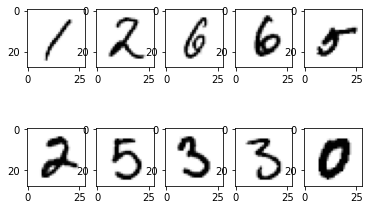

In [6]:
def viz_data(X_train):
    # Plot the first 10 datapoints in the training set using matplotlib
    
    X_train_sample = X_train[:10,]
    
    f, axarr = plt.subplots(2,5)

    for y in range(0,2):
      for x in range(0,5):
        im_num = (x+y*5)
        axarr[y,x].imshow(X_train_sample[im_num], cmap='Greys')
    

viz_data(X_train)

### Model

#### Neural network structure
- For this network, we'll use 2 hidden layers
- Layer 1 should have 128 nodes, a dropout rate of 20%, and relu as its activation function
- Layer 2 should have 64 nodes, a dropout rate of 20%, and relu as its activation function
- The last layer should map back to the 10 possible MNIST class. Use softmax as the activation



In [7]:
def build_model(model_num = 1):
    # TODO: build the model, 
    # HINT: you should have Total params: 109,386

    model1 = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation='softmax')])
    
    # Add another more complicated model for use later
    # 0.9890 at 20 epochs, 0.9920 at 100 epochs. 160,000 params
    model2 = keras.models.Sequential([
        keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28,1)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(32, (3,3), activation='relu'),
        keras.layers.Conv2D(32, (5,5), strides=2, activation='relu',padding='same'),
        keras.layers.Dropout(rate=0.4),
        keras.layers.Conv2D(64, (3,3), activation='relu',),
        keras.layers.Conv2D(64, (5,5), strides=2, activation='relu', padding='same'),
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(rate=0.4),
        keras.layers.Dense(10, activation='softmax')])
               
    if model_num == 1:
        return model1
    elif model_num == 2:  
        return model2

model = build_model(model_num=1)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trai

# Model compilation

- what loss function should you use?
- Note your choice of optimizer
- Include accuracy as a metric

# Model training
- Use a batch size of 128, and train for 12 epochs
- Use verbose training, include validation data


In [9]:
def compile_model(model):
    # TODO: compile the model

    # Use sparse categorical crossentropy since labels are encoded as values, not binary

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model


def train_model(model, X_train, Y_train, X_val, Y_val):
    # TODO: train the model
    
    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=12, batch_size=128, verbose=1)
    return model, history


model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)

Epoch 1/12
274/274 [==============================] - 2s 6ms/step - loss: 0.5723 - accuracy: 0.8285 - val_loss: 0.2249 - val_accuracy: 0.9326
Epoch 2/12
274/274 [==============================] - 1s 5ms/step - loss: 0.2492 - accuracy: 0.9266 - val_loss: 0.1663 - val_accuracy: 0.9509
Epoch 3/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1878 - accuracy: 0.9437 - val_loss: 0.1350 - val_accuracy: 0.9586
Epoch 4/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1469 - accuracy: 0.9581 - val_loss: 0.1229 - val_accuracy: 0.9626
Epoch 5/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1280 - accuracy: 0.9625 - val_loss: 0.1114 - val_accuracy: 0.9649
Epoch 6/12
274/274 [==============================] - 1s 5ms/step - loss: 0.1103 - accuracy: 0.9666 - val_loss: 0.1022 - val_accuracy: 0.9683
Epoch 7/12
274/274 [==============================] - 1s 5ms/step - loss: 0.0981 - accuracy: 0.9697 - val_loss: 0.1023 - val_accuracy: 0.9696
Epoch 

# Model evaluation
- Show the performance on the test set
- What is the difference between "evaluate" and "predict"?
- Identify a few images the model classifies incorrectly. Any observations?

In [10]:
def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    test_loss, test_accuracy = model.evaluate(X_test, Y_test)

    return test_loss, test_accuracy

test_loss, test_accuracy = eval_model(model, X_test, Y_test)

657/657 [==============================] - 2s 3ms/step - loss: 0.1017 - accuracy: 0.9713


## Further exploration (Not evaluated)
Looking for something else  to do?
- Transform your code to do hyperparameter search. 
- You can vary the number of nodes in the layers, the drop out rate, the optimizer and the parameters in Adam, the batch size, etc.


Target 5.0
Prediction 5
Predictions: [0.    0.    0.    0.006 0.    0.994 0.    0.    0.    0.   ]


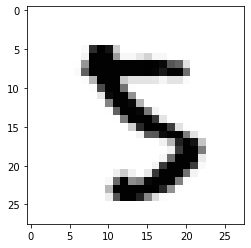

In [11]:
# Look at an image from the test set
import numpy as np

image_num = 0

testimg = X_test[image_num]
testimg = np.expand_dims(testimg, axis=0)

plt.imshow(X_test[image_num], cmap='Greys')

pred = model.predict(testimg)
print('Target', Y_test[image_num])
print('Prediction', np.argmax(pred))
print('Predictions:', np.round(pred[0],3))


In [12]:
# Significant portions of code below taken from: https://www.tensorflow.org/tutorials/keras/classification

# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

In [13]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("[{}] {} {:2.0f}% ({})".format(i, class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

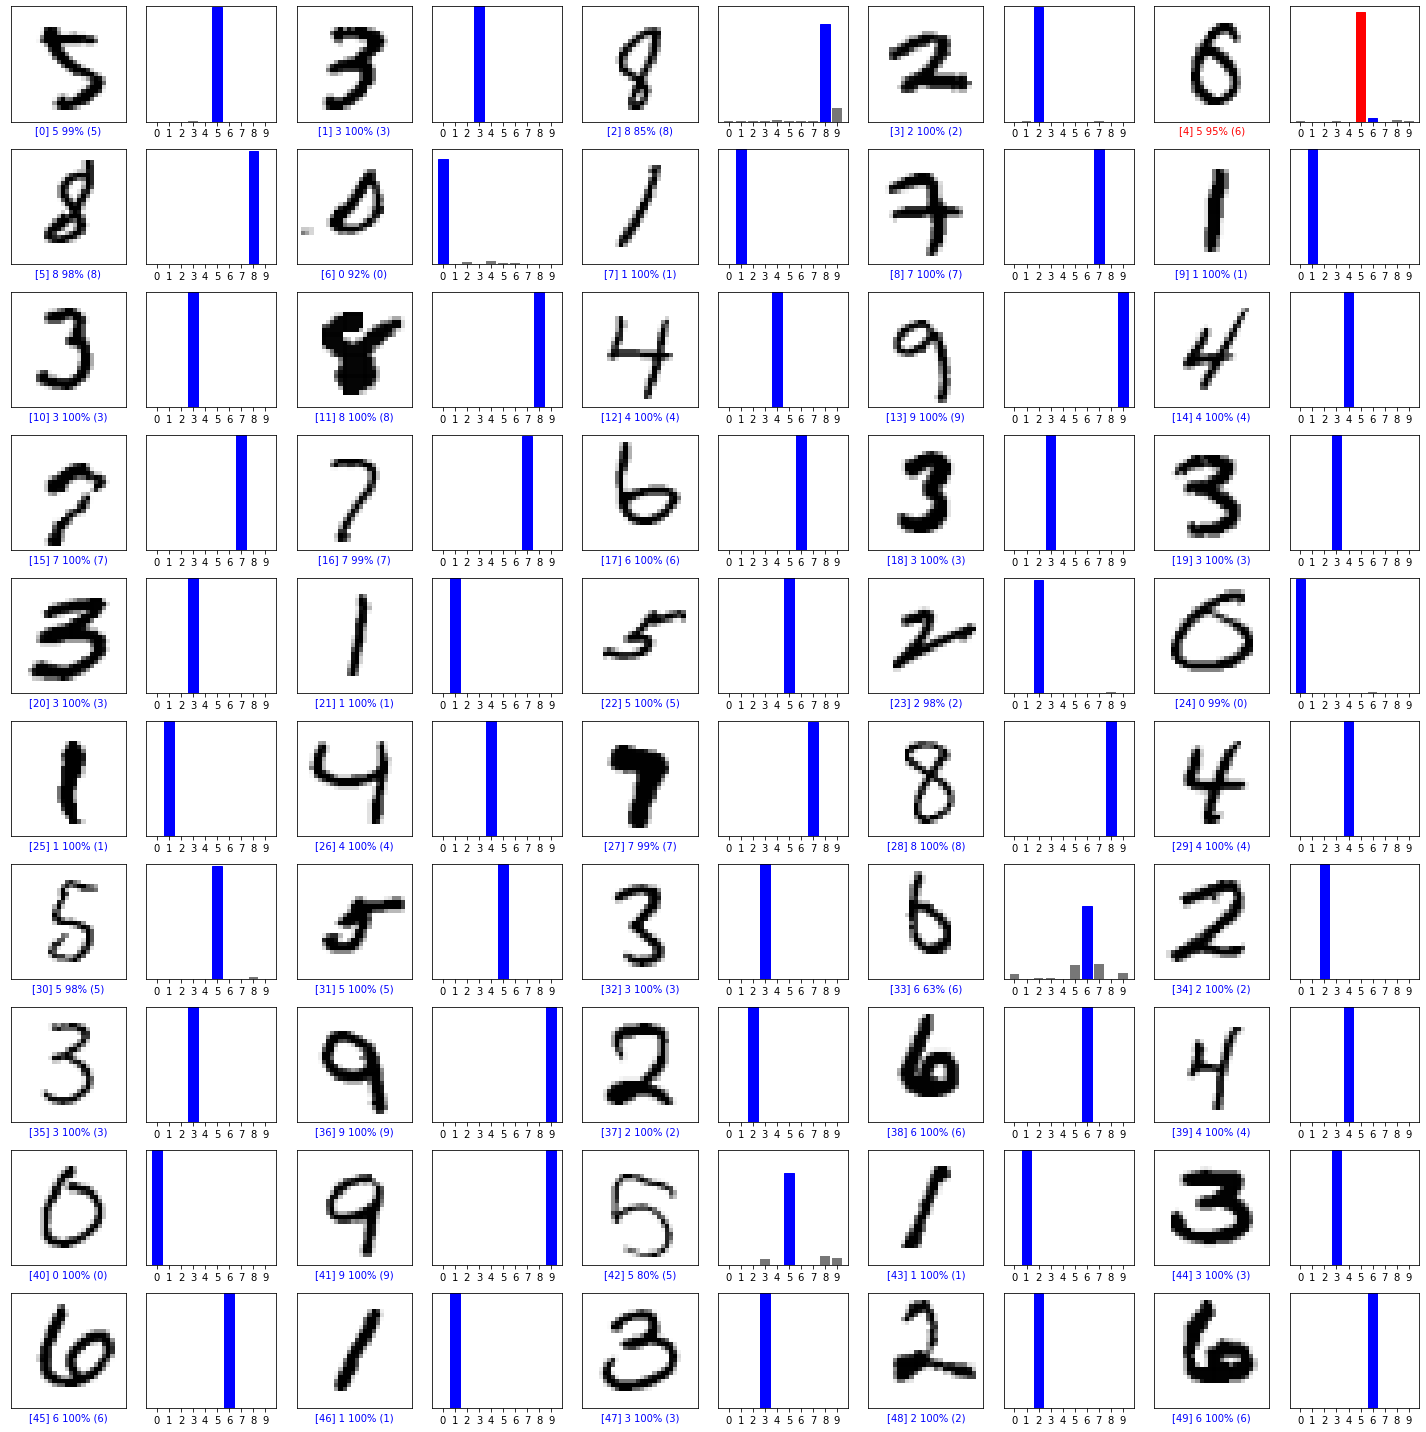

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

test_labels = Y_test.astype(int)
test_images = X_test
predictions = model.predict(test_images)

num_rows = 10
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Test with your own image

In [15]:
import os
from google.colab import files
import PIL

# Upload an image titles 'test_image.jpg'
# Best chance of success if the image is square

# Check if image already exists, and if so, delete it
if (os.path.exists('test_image.jpg')):
    !rm 'test_image.jpg'    # Delete the file


# Upload a new image to test
uploaded_file = files.upload()

Saving test_image.jpg to test_image.jpg


In [16]:
# Load test image
test_image = PIL.Image.open('test_image.jpg')

# Resize to 28x28
test_image = test_image.resize((28,28))

# Convert to greyscale
test_image = test_image.convert(mode='L')

# Invert image colours (seems to be loading with black background)
test_image = PIL.ImageChops.invert(test_image)

# Reshape to 28x28
test_image = np.reshape(test_image, (28,28))

# Scale image colour values
test_image = test_image/255.0


Predicted Class: 3
Predictions: [0.    0.003 0.141 0.834 0.    0.    0.    0.002 0.019 0.   ]


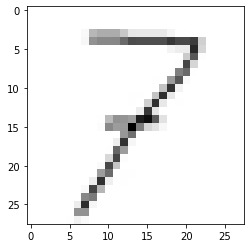

In [17]:
# Predict image class

test_image_expanded = np.expand_dims(test_image, axis=0)

plt.imshow(test_image, cmap='Greys')

pred = model.predict(test_image_expanded)

print('Predicted Class:', np.argmax(pred))
print('Prediction probabilities:', np.round(pred[0],3))

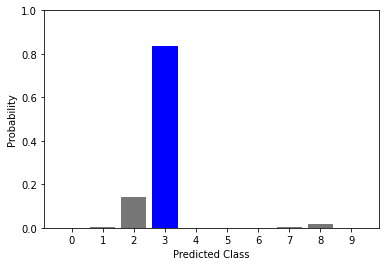

In [18]:
# Plot the probability of predicted classes

plt.grid(False)
plt.xticks(range(10))

thisplot = plt.bar(range(10), pred[0], color="#777777")
plt.ylim([0, 1])
predicted_label = np.argmax(pred)

thisplot[predicted_label].set_color('blue')

plt.xlabel('Predicted Class')
plt.ylabel('Probability');